In [ ]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

In [ ]:
import os
import pandas as pd
import shutil

# Path to the Excel file
excel_file = "C:\Users\Admin\Documents\xbemberakova\pythonProject1\Nove\klasotuput\final_predicted.xlsx"

# Path to the Excel file
# excel_file = "/content/drive/MyDrive/diplomovka/classification_dataset/glaucoma_mask_data.xlsx"

# Path to the folder containing all the images
images_folder = "C:\Users\Admin\Documents\xbemberakova\pythonProject1\Nove\klasotuput\predicted"

# Path to the folder where you want to copy the images
output_folder = "C:\Users\Admin\Documents\xbemberakova\pythonProject1\Nove\klasotuput\110predictedTest"

# Read the Excel file into a pandas DataFrame
data = pd.read_excel(excel_file)

# Change file extensions in the ImgName column from .jpg to .png
#data['ImgName'] = data['ImgName'].str.replace('.png', '.jpg')

# Save the modified DataFrame back to the Excel file
#data.to_excel(excel_file, index=False)

# Iterate through each row in the DataFrame
for index, row in data.iterrows():
    img_name = row['ImgName']
    label = row['Label']

    # Source path of the image
    src_path = os.path.join(images_folder, img_name)

    # Destination folder path based on label
    if label == 0:
        dest_folder = os.path.join(output_folder, "normal")
    elif label == 1:
        dest_folder = os.path.join(output_folder, "glaucoma")
    else:
        print(f"Invalid label found for image {img_name}")
        continue

    # Destination path of the image
    dest_path = os.path.join(dest_folder, img_name)

    # Create destination folder if it doesn't exist
    os.makedirs(dest_folder, exist_ok=True)

    # Copy the image to the destination folder
    shutil.copy(src_path, dest_path)

    print(f"Copied {img_name} to {dest_folder}")

print("Done!")

In [ ]:
import pandas as pd

# Replace 'your_file.xlsx' with the path to your Excel file
file_path = r'C:\Users\Admin\Documents\xbemberakova\pythonProject1\glaucoma_mask_data.xlsx'

# Load the Excel file
df = pd.read_excel(file_path)

# Count the occurrences of 0 and 1 in the 'label' column
count_0 = df['Label'].value_counts().get(0, 0)
count_1 = df['Label'].value_counts().get(1, 0)

print(f"Number of 0s: {count_0}")
print(f"Number of 1s: {count_1}")

Number of 0s: 1926
Number of 1s: 544


In [ ]:
# Define categories
categories = ['NORMAL', 'GLAUCOMA']

# Define path to your dataset
base_dir = r"C:\Users\Admin\Documents\xbemberakova\pythonProject1\Nove\klasotuput\836predictedTrain\trainrefuge"
#predicted_dir = r"C:\Users\Admin\Documents\xbemberakova\pythonProject1\Nove\Klasifikacia"


train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
val_dir = os.path.join(base_dir, 'val')

# Define batch size
batch_size = 16

# Create image data generators
train_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator(#rescale=1./255,dtype="float16"
     )
test_datagen = ImageDataGenerator(#rescale=1./255,dtype="float16"
     )

# Flow training, validation, and test images in batches
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical')

# detektory hran, odstranenie sumu,

Found 212 images belonging to 2 classes.
Found 53 images belonging to 2 classes.
Found 38 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import ResNet50, ResNet101, ResNet152
from tensorflow.keras.applications import VGG16
from classification_models.models.resnet import ResNet152
from keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.applications import MobileNetV2, MobileNetV3Large, MobileNetV3Small

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.applications import InceptionV3, ResNet50, EfficientNetB0

# Load pretrained model (VGG16)
#base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
#base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
#base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))



# Freeze pretrained layers
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Add custom classification layers
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')
])

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
#
# # Model Design
# model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
#     MaxPooling2D((2, 2)),
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),
#     Conv2D(128, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),
#     Flatten(),
#     Dense(512, activation='relu'),
#     Dropout(0.5),
#     Dense(len(categories), activation='softmax')  # Assuming 10 classes
# ])

In [ ]:
# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Define callbacks
#checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience=4, verbose=1, restore_best_weights=True)

In [ ]:
# Train model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=100,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    callbacks=[early_stopping])

Epoch 1/100
13/13 [==============================] - 15s 1s/step - loss: 1.5289 - accuracy: 0.6633 - val_loss: 0.1640 - val_accuracy: 0.9792
Epoch 2/100
13/13 [==============================] - 12s 917ms/step - loss: 0.9343 - accuracy: 0.7449 - val_loss: 0.2887 - val_accuracy: 0.8958
Epoch 3/100
13/13 [==============================] - 12s 901ms/step - loss: 0.4294 - accuracy: 0.8316 - val_loss: 0.1540 - val_accuracy: 0.9375
Epoch 4/100
13/13 [==============================] - 12s 903ms/step - loss: 0.2742 - accuracy: 0.9031 - val_loss: 0.2279 - val_accuracy: 0.9375
Epoch 5/100
13/13 [==============================] - 12s 902ms/step - loss: 0.3761 - accuracy: 0.8776 - val_loss: 0.1561 - val_accuracy: 0.9375
Epoch 6/100
13/13 [==============================] - 12s 910ms/step - loss: 0.2973 - accuracy: 0.8776 - val_loss: 0.1443 - val_accuracy: 0.9375
Epoch 7/100
13/13 [==============================] - 12s 953ms/step - loss: 0.3100 - accuracy: 0.8798 - val_loss: 0.1446 - val_accuracy: 0.

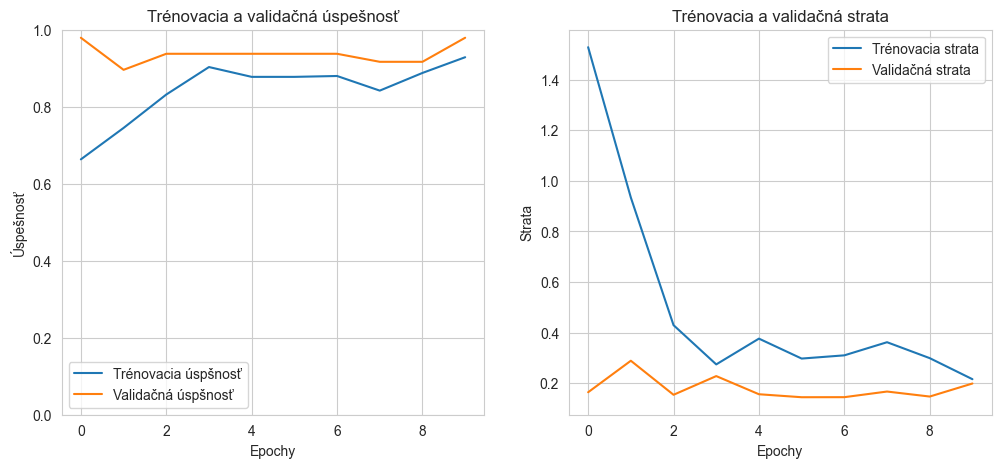

3/3 - 2s - loss: 0.3949 - accuracy: 0.8158 - 2s/epoch - 693ms/step

Test accuracy: 0.8157894611358643


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Trénovacia úspšnosť')
plt.plot(history.history['val_accuracy'], label = 'Validačná úspšnosť')
plt.title('Trénovacia a validačná úspešnosť')
plt.xlabel('Epochy')
plt.ylabel('Úspešnosť')
plt.ylim([0, 1])
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Trénovacia strata')
plt.plot(history.history['val_loss'], label='Validačná strata')
plt.title('Trénovacia a validačná strata')
plt.xlabel('Epochy')
plt.ylabel('Strata')
plt.legend()
plt.show()

# Evaluate model on test data
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('\nTest accuracy:', test_acc)

1/1 [==============================] - 0s 293ms/step


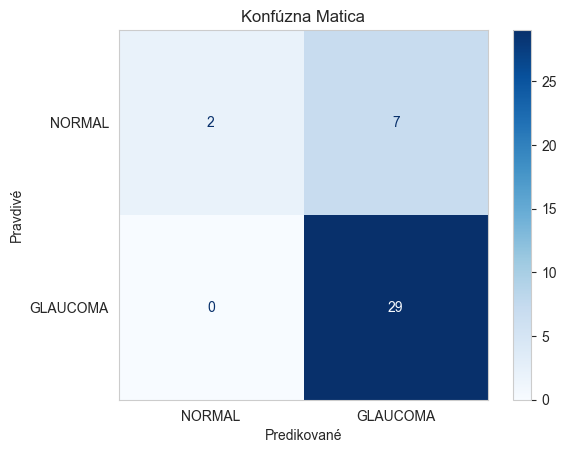

In [ ]:
# Get true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate over batches of test data generator
for i in range(len(test_generator)):
    X_batch, y_batch = test_generator[i]
    true_labels.extend(np.argmax(y_batch, axis=1))
    predicted_labels.extend(np.argmax(model.predict(X_batch), axis=1))

# Convert lists to numpy arrays
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# Define categories
categories = ['NORMAL', 'GLAUCOMA']

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=categories)
disp.plot(cmap=plt.cm.Blues)
plt.title('Konfúzna Matica')
plt.xlabel('Predikované')
plt.ylabel('Pravdivé')
plt.grid(False)
plt.show()

1/1 [==============================] - 0s 290ms/step


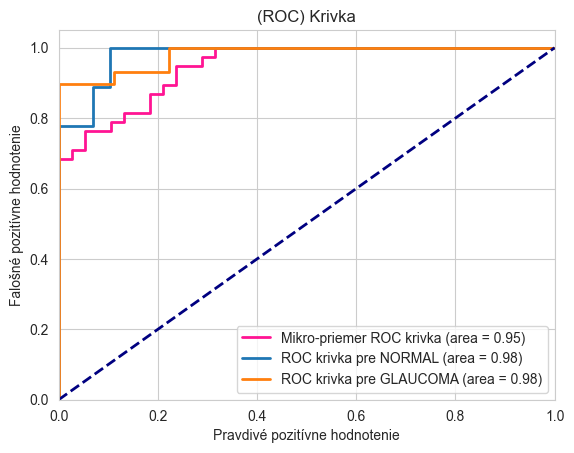

In [ ]:
# Get true labels and predicted probabilities for each class
true_labels = []
predicted_probs = []

# Iterate over batches of test data generator
for i in range(len(test_generator)):
    X_batch, y_batch = test_generator[i]
    true_labels.extend(y_batch)
    predicted_probs.extend(model.predict(X_batch))

# Convert lists to numpy arrays
true_labels = np.array(true_labels)
predicted_probs = np.array(predicted_probs)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(categories)):
    fpr[i], tpr[i], _ = roc_curve(true_labels[:, i], predicted_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(true_labels.ravel(), predicted_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr["micro"], tpr["micro"], color='deeppink', lw=lw, label='Mikro-priemer ROC krivka (area = {0:0.2f})'
             ''.format(roc_auc["micro"]))
for i, category in zip(range(len(categories)), categories):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC krivka pre {0} (area = {1:0.2f})'
             ''.format(category, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Pravdivé pozitívne hodnotenie')
plt.ylabel('Falošné pozitívne hodnotenie')
plt.title('(ROC) Krivka')
plt.legend(loc="lower right")
plt.show()


rozdeleniedat

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define the paths to your data
normal_images_path = r'C:\Users\Admin\Documents\xbemberakova\pythonProject1\Nove\klasotuput\origa_vsetky\normal'
glaucoma_images_path = r'C:\Users\Admin\Documents\xbemberakova\pythonProject1\Nove\klasotuput\origa_vsetky\glaucoma'

# List all images in each category
normal_images = os.listdir(normal_images_path)
glaucoma_images = os.listdir(glaucoma_images_path)

# Create a combined list of all images and their labels
all_images = normal_images + glaucoma_images
labels = ['normal'] * len(normal_images) + ['glaucoma'] * len(glaucoma_images)

# Split the data
train_images, val_images, train_labels, val_labels = train_test_split(all_images, labels, test_size=0.2, stratify=labels, random_state=42)

# Define the directories for training and validation data
train_dir = r'C:\Users\Admin\Documents\xbemberakova\pythonProject1\Nove\klasotuput\origa_vsetky\train'
val_dir = r'C:\Users\Admin\Documents\xbemberakova\pythonProject1\Nove\klasotuput\origa_vsetky\val'

# Create the directories if they don't exist
os.makedirs(os.path.join(train_dir, 'normal'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'glaucoma'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'normal'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'glaucoma'), exist_ok=True)

# Copy the images to their respective directories
for image, label in zip(train_images, train_labels):
    if label == 'normal':
        shutil.copy(os.path.join(normal_images_path, image), os.path.join(train_dir, 'normal', image))
    else:
        shutil.copy(os.path.join(glaucoma_images_path, image), os.path.join(train_dir, 'glaucoma', image))

for image, label in zip(val_images, val_labels):
    if label == 'normal':
        shutil.copy(os.path.join(normal_images_path, image), os.path.join(val_dir, 'normal', image))
    else:
        shutil.copy(os.path.join(glaucoma_images_path, image), os.path.join(val_dir, 'glaucoma', image))

print("Data has been split and copied successfully.")


Data has been split and copied successfully.
